In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline


sns.set_style("darkgrid")

In [2]:
df= pd.read_csv("Folds5x2_pp.csv")

In [3]:
df=df.dropna()

In [4]:
df[9566:9570]

,AT,V,AP,RH,PE
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.6,62.52,1017.23,67.87,453.28
9568,AT,V,AP,RH,PE
9569,9.59,38.56,1017.01,60.1,481.3


In [5]:
df=df.reset_index(drop=True)

In [6]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.4,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.5,1009.23,96.62,473.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47844 entries, 0 to 47843
Data columns (total 5 columns):
AT    47844 non-null object
V     47844 non-null object
AP    47844 non-null object
RH    47844 non-null object
PE    47844 non-null object
dtypes: object(5)
memory usage: 1.8+ MB


In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

In [9]:
df=df.dropna()

In [10]:
df=df.reset_index(drop=True)

In [11]:
print(df[df['AT'].isnull()])

Empty DataFrame
Columns: [AT, V, AP, RH, PE]
Index: []


Text(0.5, 6.799999999999983, 'Temperature (Celsius)')

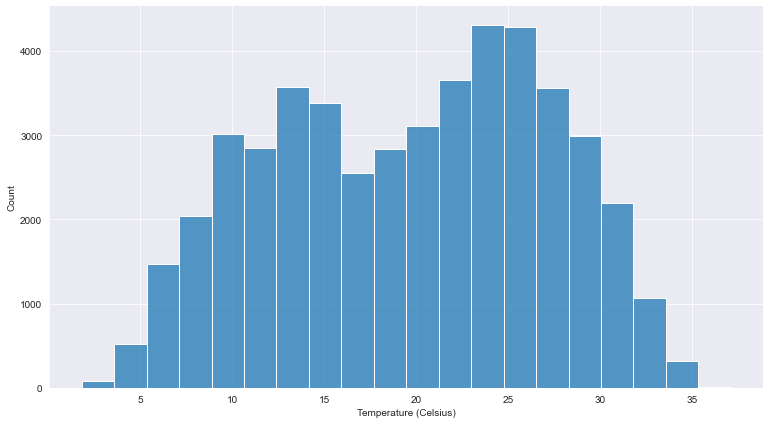

In [12]:
sns.displot(df["AT"],bins=20,height=6, aspect=1.8)
plt.xlabel("Temperature (Celsius)")

Text(0.5, 6.799999999999983, 'Ambient Pressure (Milibar)')

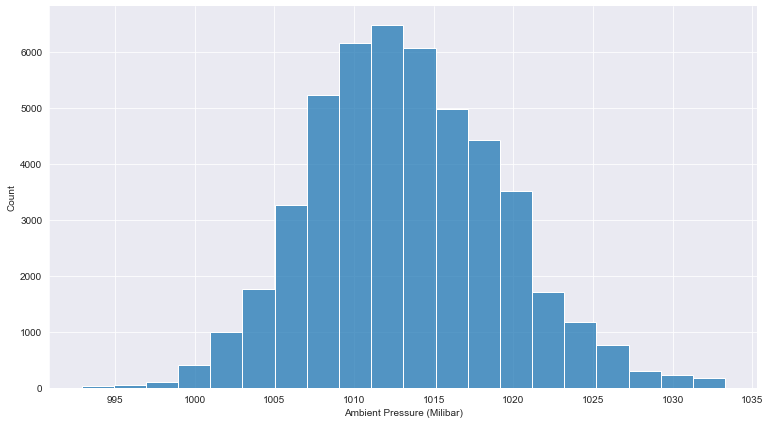

In [13]:
sns.displot(df["AP"],bins=20,height=6, aspect=1.8)
plt.xlabel("Ambient Pressure (Milibar)")

Text(0.5, 6.799999999999983, 'Relative Humidity (Percentage)')

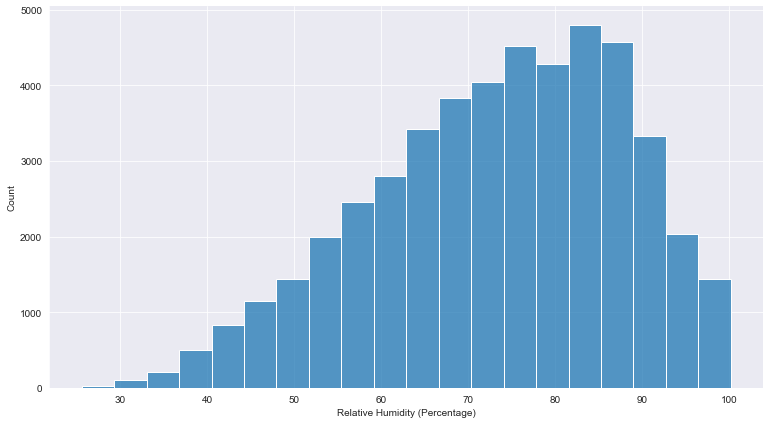

In [14]:
sns.displot(df["RH"],bins=20, height=6, aspect=1.8)
plt.xlabel("Relative Humidity (Percentage)")

Text(0.5, 6.799999999999983, 'Exhaust Vacuum (Cm of Hg)')

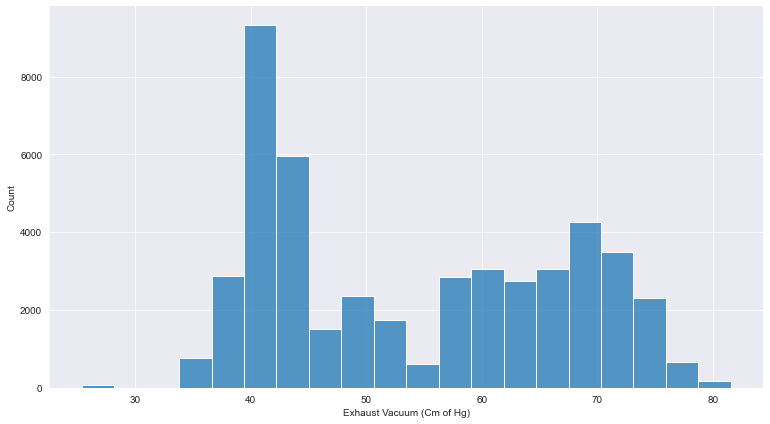

In [15]:

sns.displot(df["V"],bins=20, height=6, aspect=1.8)

plt.xlabel("Exhaust Vacuum (Cm of Hg)")

Text(0.5, 6.799999999999983, 'Net hourly electrical energy output (MW)')

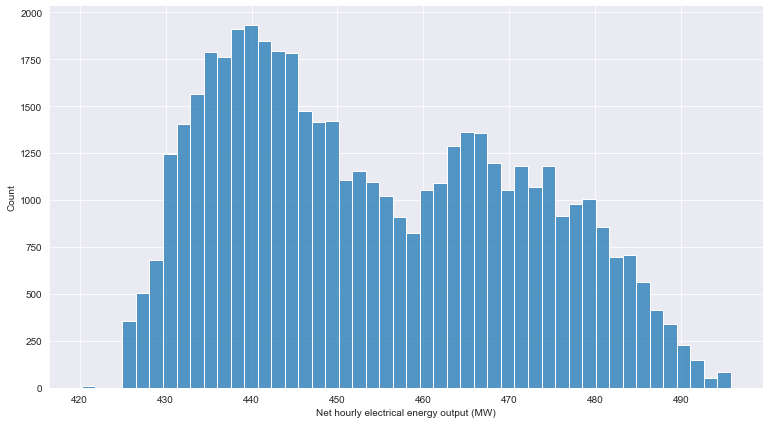

In [16]:
sns.displot(df["PE"],height=6, aspect=1.8)
plt.xlabel("Net hourly electrical energy output (MW)")

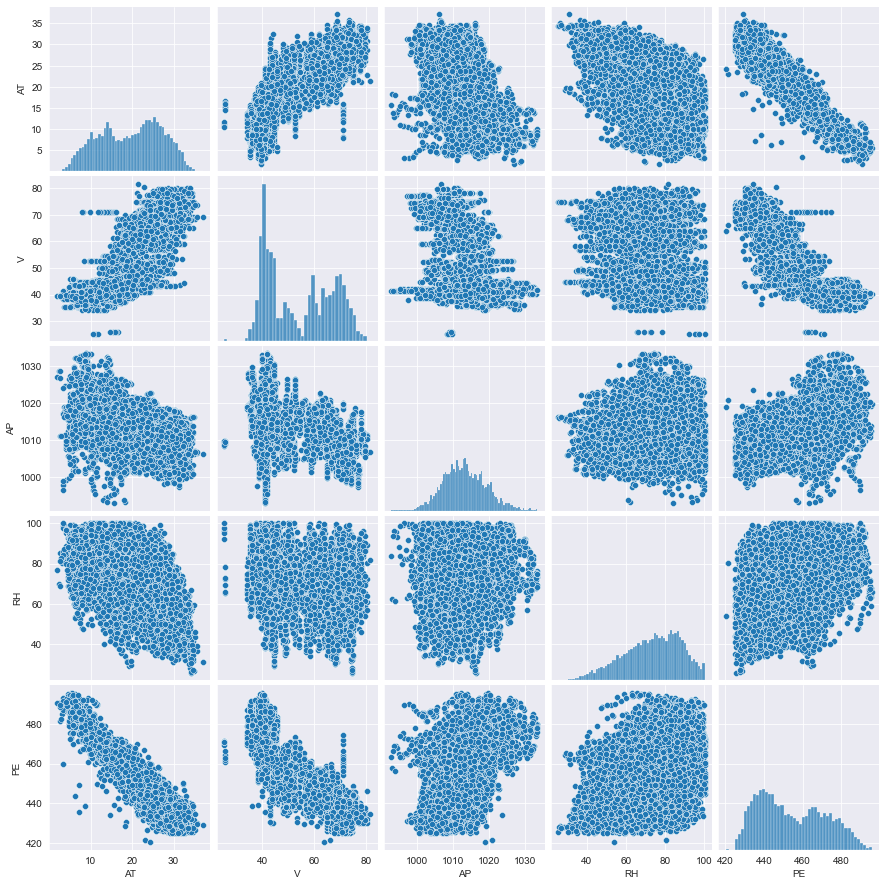

In [17]:
sns.pairplot(df)

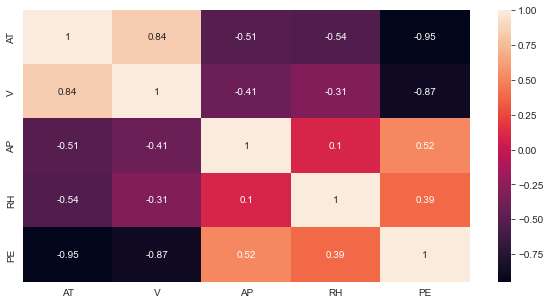

In [18]:
corr = df.corr()


plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

Text(0.5, 0, 'Temperature (Celsius)')

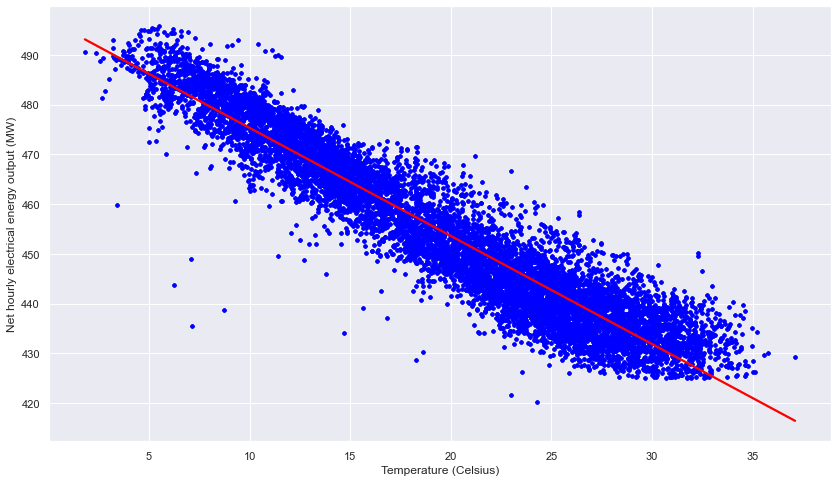

In [19]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.regplot(x="AT", y="PE", data=df, marker=".", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Net hourly electrical energy output (MW)")
plt.xlabel("Temperature (Celsius)")

Text(0.5, 0, 'Ambient Pressure (Milibar)')

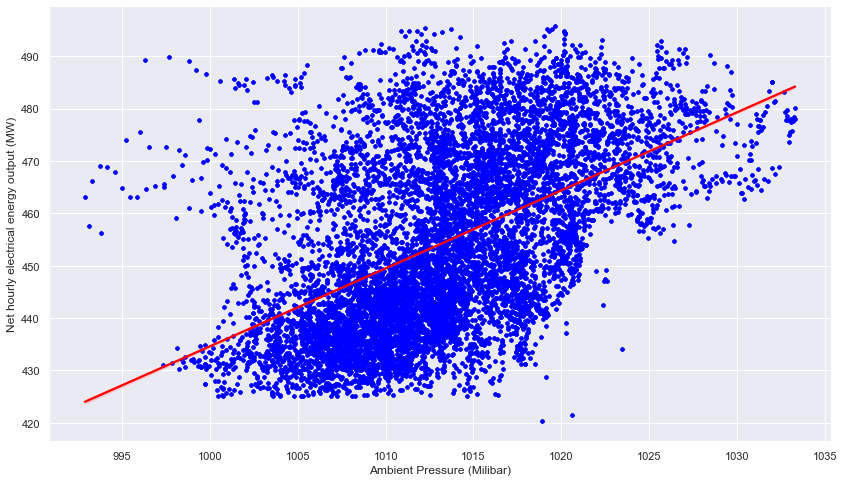

In [20]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.regplot(x="AP", y="PE", data=df, marker=".", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Net hourly electrical energy output (MW)")
plt.xlabel("Ambient Pressure (Milibar)")

Text(0.5, 0, 'Relative Humidity (Percentage)')

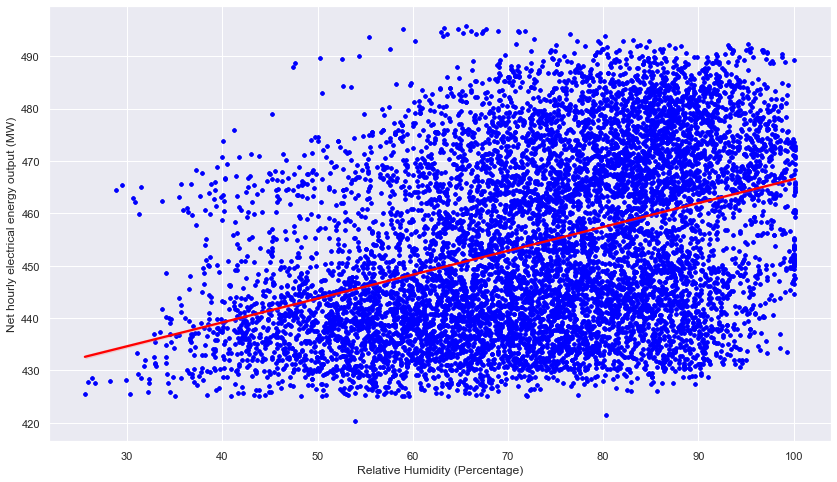

In [21]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.regplot(x="RH", y="PE", data=df, marker=".", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Net hourly electrical energy output (MW)")
plt.xlabel("Relative Humidity (Percentage)")

Text(0.5, 0, 'Exhaust Vacuum (Cm of Hg)')

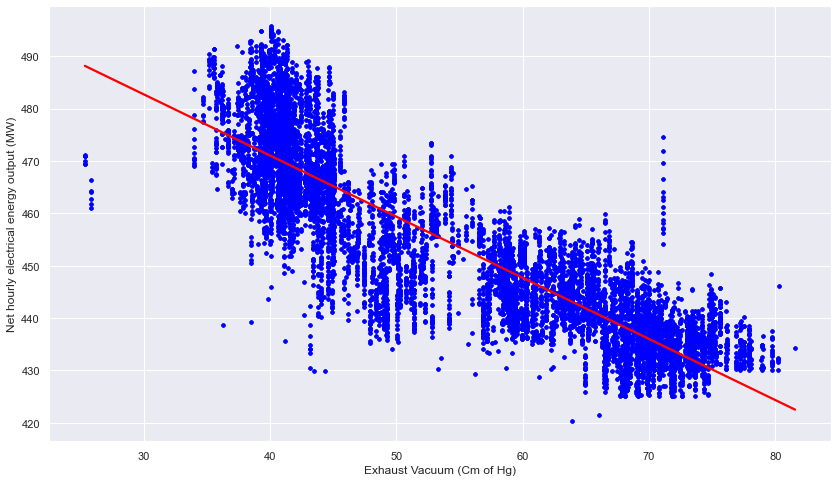

In [22]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(14,8))
sns.regplot(x="V", y="PE", data=df, marker=".", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Net hourly electrical energy output (MW)")
plt.xlabel("Exhaust Vacuum (Cm of Hg)")

In [23]:
data=df.copy(deep=True)

In [24]:
data


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93


In [25]:
data = data.apply(pd.to_numeric, errors='coerce')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
AT    47840 non-null float64
V     47840 non-null float64
AP    47840 non-null float64
RH    47840 non-null float64
PE    47840 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


In [27]:
data["Temp"] = np.nan
data["Humid"] = np.nan

In [28]:
data[9566:9570]

,AT,V,AP,RH,PE,Temp,Humid
9566,24.48,69.45,1013.86,62.39,435.74,NaN,NaN
9567,21.60,62.52,1017.23,67.87,453.28,NaN,NaN
9568,9.59,38.56,1017.01,60.10,481.30,NaN,NaN
9569,12.04,42.34,1019.72,94.67,465.36,NaN,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 7 columns):
AT       47840 non-null float64
V        47840 non-null float64
AP       47840 non-null float64
RH       47840 non-null float64
PE       47840 non-null float64
Temp     0 non-null float64
Humid    0 non-null float64
dtypes: float64(7)
memory usage: 2.6 MB


In [30]:
for i in range(len(data)):
    if data["AT"][i]<15:
        data["Temp"][i]=1 #1 = cool temperature
        
    elif(data["AT"][i]>=15  and data["AT"][i]<25 ):
        data["Temp"][i]=2 #2 = normal temperature
        
    elif(data["AT"][i]>=25 ):
        data["Temp"][i]=3 #3 = warm temperature
        

        

In [31]:
for i in range(len(data)):
    if data["RH"][i]<30:
        data["Humid"][i]=1 #1 = dry 
        
    elif(data["RH"][i]>=30  and data["RH"][i]<50 ):
        data["Humid"][i]=2 #2 = less dry
        
    elif(data["RH"][i]>=50  and data["RH"][i]<70 ):
        data["Humid"][i]=3 #3 = moderate humidity
    
    elif(data["RH"][i]>=70 ):
        data["Humid"][i]=4 #4 = high humidity

In [32]:
data.head()

,AT,V,AP,RH,PE,Temp,Humid
0,14.96,41.76,1024.07,73.17,463.26,1.0,4.0
1,25.18,62.96,1020.04,59.08,444.37,3.0,3.0
2,5.11,39.40,1012.16,92.14,488.56,1.0,4.0
3,20.86,57.32,1010.24,76.64,446.48,2.0,4.0
4,10.82,37.50,1009.23,96.62,473.90,1.0,4.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 7 columns):
AT       47840 non-null float64
V        47840 non-null float64
AP       47840 non-null float64
RH       47840 non-null float64
PE       47840 non-null float64
Temp     47840 non-null float64
Humid    47840 non-null float64
dtypes: float64(7)
memory usage: 2.6 MB


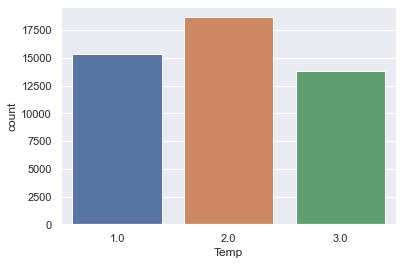

In [34]:
sns.countplot(x="Temp", data=data)

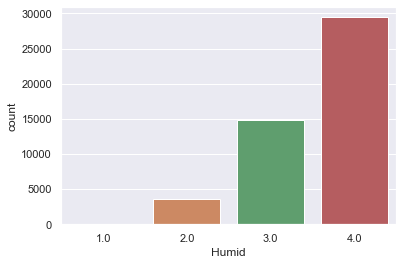

In [35]:
sns.countplot(x="Humid", data=data)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 7 columns):
AT       47840 non-null float64
V        47840 non-null float64
AP       47840 non-null float64
RH       47840 non-null float64
PE       47840 non-null float64
Temp     47840 non-null float64
Humid    47840 non-null float64
dtypes: float64(7)
memory usage: 2.6 MB


In [37]:
data["AT_n"] = np.nan
data["V_n"] = np.nan
data["AP_n"] = np.nan
data["RH_n"] = np.nan

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 11 columns):
AT       47840 non-null float64
V        47840 non-null float64
AP       47840 non-null float64
RH       47840 non-null float64
PE       47840 non-null float64
Temp     47840 non-null float64
Humid    47840 non-null float64
AT_n     0 non-null float64
V_n      0 non-null float64
AP_n     0 non-null float64
RH_n     0 non-null float64
dtypes: float64(11)
memory usage: 4.0 MB


In [39]:
data.isnull().sum()

AT           0
V            0
AP           0
RH           0
PE           0
Temp         0
Humid        0
AT_n     47840
V_n      47840
AP_n     47840
RH_n     47840
dtype: int64

In [40]:
data.head()

,AT,V,AP,RH,PE,Temp,Humid,AT_n,V_n,AP_n,RH_n
0,14.96,41.76,1024.07,73.17,463.26,1.0,4.0,NaN,NaN,NaN,NaN
1,25.18,62.96,1020.04,59.08,444.37,3.0,3.0,NaN,NaN,NaN,NaN
2,5.11,39.40,1012.16,92.14,488.56,1.0,4.0,NaN,NaN,NaN,NaN
3,20.86,57.32,1010.24,76.64,446.48,2.0,4.0,NaN,NaN,NaN,NaN
4,10.82,37.50,1009.23,96.62,473.90,1.0,4.0,NaN,NaN,NaN,NaN


In [41]:
data=data.fillna(method="ffill")

In [42]:
data.isnull().sum()

AT           0
V            0
AP           0
RH           0
PE           0
Temp         0
Humid        0
AT_n     47840
V_n      47840
AP_n     47840
RH_n     47840
dtype: int64

In [43]:
 for i in range(len(data)):
        
        data["AT_n"][i]=( data["AT"][i]- data["AT"].min()  )/ (data["AT"].max()-  data["AT"].min())

In [44]:
 for i in range(len(data)):
        
        data["V_n"][i]=( data["V"][i]- data["V"].min()  )/ (data["V"].max()-  data["V"].min())

In [45]:
 for i in range(len(data)):
        
        data["AP_n"][i]=( data["AP"][i]- data["AP"].min()  )/ (data["AP"].max()-  data["AP"].min())

In [46]:
 for i in range(len(data)):
        
        data["RH_n"][i]=( data["RH"][i]- data["RH"].min()  )/ (data["RH"].max()-  data["RH"].min())

In [47]:
data.head()

,AT,V,AP,RH,PE,Temp,Humid,AT_n,V_n,AP_n,RH_n
0,14.96,41.76,1024.07,73.17,463.26,1.0,4.0,0.372521,0.291815,0.771591,0.638204
1,25.18,62.96,1020.04,59.08,444.37,3.0,3.0,0.662040,0.669039,0.671863,0.449330
2,5.11,39.40,1012.16,92.14,488.56,1.0,4.0,0.093484,0.249822,0.476862,0.892493
3,20.86,57.32,1010.24,76.64,446.48,2.0,4.0,0.539660,0.568683,0.429349,0.684718
4,10.82,37.50,1009.23,96.62,473.90,1.0,4.0,0.255241,0.216014,0.404355,0.952547
